In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("car_dekho.csv")

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data['Car_Age'] = 2024 - data['Year'] 

In [5]:
data['Selling_Price']=100*data['Selling_Price']
data['Present_Price']=100*data['Present_Price']

In [6]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,2014,335.0,559.0,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,475.0,954.0,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,725.0,985.0,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,285.0,415.0,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,460.0,687.0,42450,Diesel,Dealer,Manual,0,10


In [7]:
categorical_features = ['Fuel_Type', 'Transmission']
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = one_hot_encoder.fit_transform(data[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(categorical_features))

In [8]:
data = data.drop(columns=categorical_features).join(encoded_df)

In [9]:
X = data[['Present_Price', 'Kms_Driven', 'Car_Age'] + list(encoded_df.columns)]
y = data['Selling_Price']

In [10]:
X

,Present_Price,Kms_Driven,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual
0,559.0,27000,10,0.0,1.0,1.0
1,954.0,43000,11,1.0,0.0,1.0
2,985.0,6900,7,0.0,1.0,1.0
3,415.0,5200,13,0.0,1.0,1.0
4,687.0,42450,10,1.0,0.0,1.0
...,...,...,...,...,...,...
296,1160.0,33988,8,1.0,0.0,1.0
297,590.0,60000,9,0.0,1.0,1.0
298,1100.0,87934,15,0.0,1.0,1.0
299,1250.0,9000,7,1.0,0.0,1.0


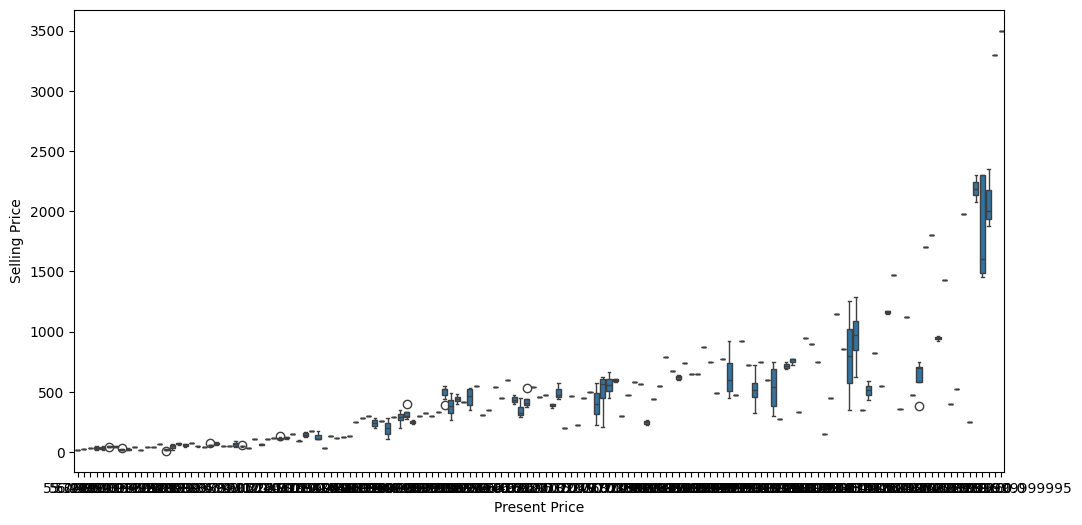

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Present_Price',y='Selling_Price',data=data)
plt.xlabel("Present Price")
plt.ylabel("Selling Price")
plt.savefig('images/present_vs_selling_price.png')
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [14]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [15]:
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 127.98476332110482
RMSE: 184.04290941727245
R²: 0.8529588321193268


In [16]:
import joblib
joblib.dump(model, 'linear_regression_resell_value_predictor.pkl')

['linear_regression_resell_value_predictor.pkl']